In [34]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [35]:
data = keras.datasets.fashion_mnist

In [36]:
(train_images, train_labels), (test_images, test_labels)= data.load_data()

In [37]:
class_names=['T-shirt/top','Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneaker', 'Bag','Ankle Boat']

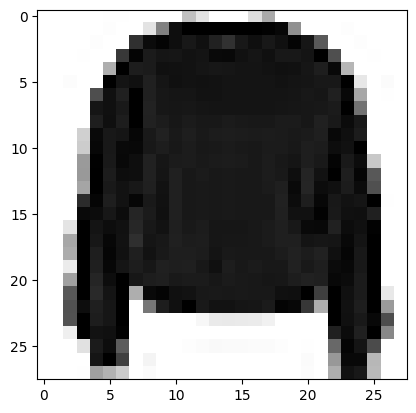

In [38]:
plt.imshow(train_images[7], cmap=plt.cm.binary)

In [39]:
print(train_images[7])

[[  0   0   0   0   0   1   1   0   0   0   0  63  28   0   0   0  33  85
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0  28 126 241 255 255 255 255 255 255 252
  248 111   0   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 206 244 251 241 230 238 221 205 230 240 230
  239 251 233 165   0   0   2   0   0   0]
 [  0   0   0   1   0   0 199 251 228 234 233 236 235 245 247 237 234 239
  230 230 235 255 176   0   0   1   0   0]
 [  0   0   0   0   0  81 254 226 228 239 237 236 234 232 233 235 235 236
  239 237 233 225 246  73   0   0   0   0]
 [  0   0   3   0   0 255 235 239 223 234 238 236 237 236 235 235 235 235
  236 235 234 230 231 255  24   0   4   0]
 [  0   0   0   0 177 239 223 254 223 232 234 234 236 236 235 235 235 235
  235 234 231 233 222 246  88   0   1   0]
 [  0   0   0   0 234 239 229 255 220 232 233 232 234 235 235 235 235 235
  234 233 232 230 228 254 140   0   0   0]
 [  0   0   0   0 225 240 226 255 221 227 232 228 231 230 228 22

In [40]:
train_images= train_images/255.0
test_images= test_images/255.0

In [41]:
print(train_images[7])

[[0.         0.         0.         0.         0.         0.00392157
  0.00392157 0.         0.         0.         0.         0.24705882
  0.10980392 0.         0.         0.         0.12941176 0.33333333
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.00784314
  0.         0.         0.10980392 0.49411765 0.94509804 1.
  1.         1.         1.         1.         1.         0.98823529
  0.97254902 0.43529412 0.         0.         0.         0.00784314
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00784314 0.
  0.         0.80784314 0.95686275 0.98431373 0.94509804 0.90196078
  0.93333333 0.86666667 0.80392157 0.90196078 0.94117647 0.90196078
  0.9372549  0.98431373 0.91372549 0.64705882 0.         0.
  0.00784314 0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.78039216 0.

In [42]:
 model=keras.Sequential([
     keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(128,activation="relu"),
     keras.layers.Dense(10,activation="softmax")
 ])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4964 - accuracy: 0.8264
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3724 - accuracy: 0.8665
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3353 - accuracy: 0.8780
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3118 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2942 - accuracy: 0.8920


test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Tested Acc: ", test_acc)

print("Tested loss: ", test_loss)

In [43]:
prediction= model.predict(test_images)
print(prediction)

313/313 [==============================] - 1s 1ms/step
[[7.98953408e-07 4.69942805e-08 1.41637270e-06 ... 5.50447665e-02
  2.65918876e-04 8.82193625e-01]
 [8.36673076e-04 1.31308150e-11 9.80525017e-01 ... 3.06027204e-10
  6.07346976e-07 5.51096929e-12]
 [1.68889085e-06 9.99997675e-01 9.93033300e-09 ... 1.71760176e-12
  4.73021711e-09 6.96165651e-12]
 ...
 [1.63530302e-03 5.31004787e-08 2.96844693e-04 ... 4.75910895e-07
  9.97350097e-01 1.31623565e-08]
 [6.95442907e-07 9.99849081e-01 6.00104997e-08 ... 8.65754402e-09
  6.61468277e-07 6.24197005e-09]
 [1.04062769e-04 2.65964417e-07 3.22708685e-04 ... 5.58084110e-03
  7.15352478e-04 3.64412299e-05]]


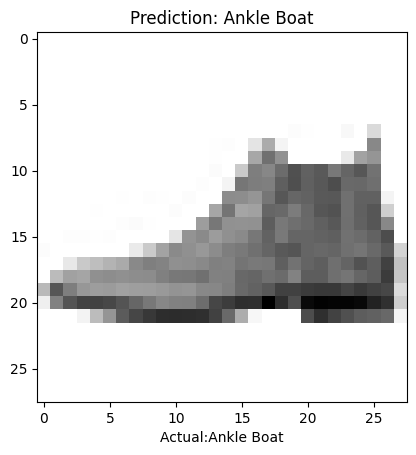

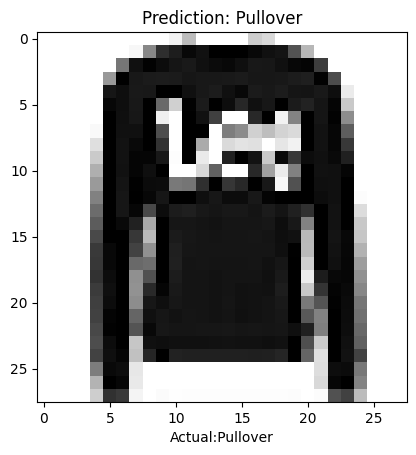

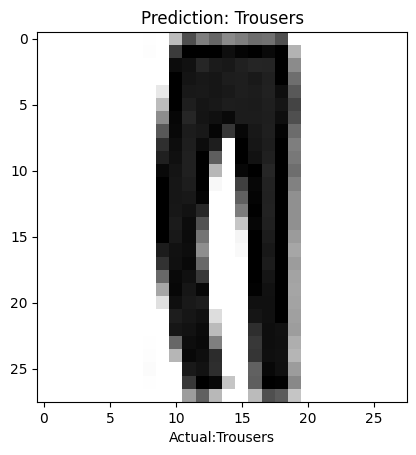

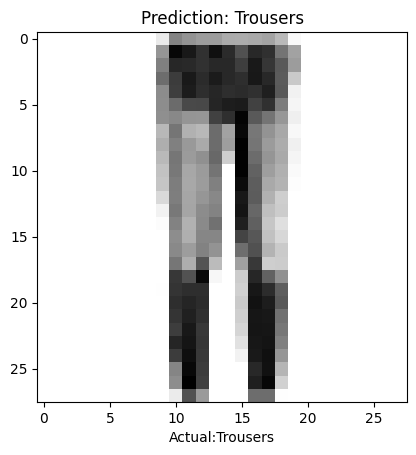

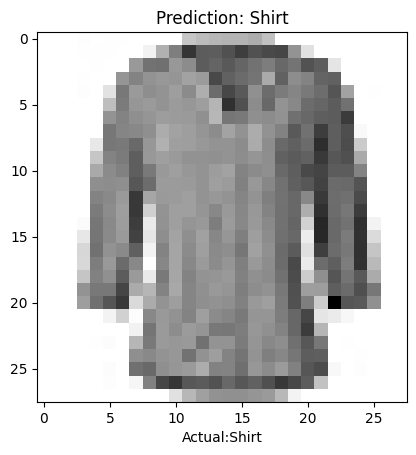

In [50]:
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    plt.xlabel("Actual:" + class_names[test_labels[i]])
    plt.title("Prediction: "+ class_names[np.argmax(prediction[i])])
    plt.show()
